# PCA - NMF - ACI

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
from scipy import stats

In [1]:
# ica_audio.py
# Author: Slim Essid
import pylab as pl
import numpy as np
import wave
from sklearn import decomposition

# -- Read audio data ----------------------------------------------------------
def wavread(filename):
    wf = wave.open(filename)
    s = np.fromstring(wf.readframes(wf.getnframes()), dtype=np.int16)
    wf.close()
    return s

def wavwrite(filename, s, nchannels=1):
    wf = wave.open(filename,'wb')
    wf.setnchannels(nchannels)
    wf.setsampwidth(2)
    wf.setframerate(32000)
    s = s/max(abs(s))*2**14 # normalise arbitrarily
    wf.writeframes(s.astype(np.int16).tostring())
    wf.close()
    
s1 = wavread('./snd/es02.wav')
s2 = wavread('./snd/si01.wav')

# -- Create stereo mix ---------------------------------------------------------
nsmp = min(len(s1), len(s2))
s1 = s1[:nsmp]
s2 = s2[:nsmp]
S = np.c_[s1, s2]

# Mixing matrix
A = np.array([ [0.6, 0.5],[0.4, 0.5]])

# Do the mix
X = S.dot(A)

# Write mix file
x = np.zeros(2*nsmp)
x[::2] = X[:,0]
x[1::2] = X[:,1]
wavwrite('./snd/mix.wav', x, nchannels=2)
# -- ICA source separation -----------------------------------------------------
...
# Visualise sources
...
# Write audio sources

/home/sonia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


Ellipsis

In [5]:
s2

array([  0,   0,   0, ..., -75, -75, -75], dtype=int16)

In [8]:
# -- ICA source separation -----------------------------------------------------
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=2,random_state=0)
r = transformer.fit_transform(X)
r

array([[ 2.82011511e-06,  1.10215565e-05],
       [ 2.82011511e-06,  1.10215565e-05],
       [ 2.82011511e-06,  1.10215565e-05],
       ...,
       [ 1.57943078e-04, -1.62612715e-04],
       [ 9.97850683e-05, -1.62093951e-04],
       [-4.94028689e-05, -1.60763207e-04]])

In [10]:
wavwrite('./snd/s1.wav', r[:,0])
wavwrite('./snd/s2.wav', r[:,1])

### EXTRACTION DE CARACTÉRISTIQUES DE VISAGES 

Dataset consists of 400 faces
2061 negative-valued pixels
2773 negative-valued pixels
2630 negative-valued pixels
1422 negative-valued pixels
1242 negative-valued pixels
1004 negative-valued pixels
2049 negative-valued pixels
1580 negative-valued pixels
1387 negative-valued pixels
3819 negative-valued pixels
---------------------data set ------------
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the li

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

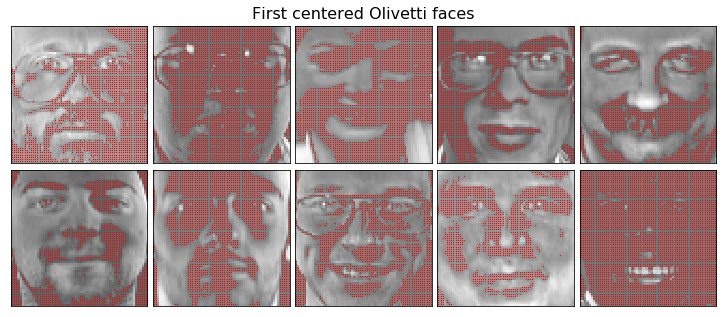

In [50]:
# pca_nmf_faces.py
# Authors: Vlad Niculae, Alexandre Gramfort, Slim Essid
# License: BSD
from time import time
from numpy.random import RandomState
import pylab as pl
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
# -- Prepare data and define utility functions ---------------------------------
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data
n_samples, n_features = faces.shape
# global centering
faces_centered = faces - faces.mean(axis=0, dtype=np.float64)
print("Dataset consists of %d faces" % n_samples)
def plot_gallery(title, images):
    pl.figure(figsize=(2. * n_col, 2.26 * n_row))
    pl.suptitle(title, size=16)
    for i, comp in enumerate(images):
        pl.subplot(n_row, n_col, i + 1)
        comp = comp.reshape(image_shape)
        vmax = comp.max()
        vmin = comp.min()
        dmy = np.nonzero(comp<0)
        if len(dmy[0])>0:
            yz, xz = dmy
        comp[comp<0] = 0
        pl.imshow(comp, cmap=pl.cm.gray, vmax=vmax, vmin=vmin)
        #print "vmax: %f, vmin: %f" % (vmax, vmin)
        #print comp
        
        if len(dmy[0])>0:
            pl.plot( xz, yz, 'r,')#, hold=True)
            print(len(dmy[0]), "negative-valued pixels")
        
        pl.xticks(())
        pl.yticks(())
    
    pl.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])
# -- Decomposition methods -----------------------------------------------------
# List of the different estimators and whether to center the data
estimators = [
    ('pca', 'Eigenfaces - PCA',
     decomposition.PCA(n_components=n_components, whiten=True),
     True),
    ('nmf', 'Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init=None, tol=1e-6,
                       max_iter=2000),
     False)
]
# -- Transform and classify ----------------------------------------------------
labels = dataset.target
print('---------------------data set ------------')

print(dataset.DESCR)

print('---------------------labels ------------')
print(labels.describe)

X = faces
X_ = faces_centered
for shortname, name, estimator, center in estimators:
    #if shortname != 'nmf': continue
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = X
    if center:
        data = X_
    data = estimator.fit_transform(data)
    
    clf.fit(data, labels)
    LinearDiscriminantAnalysis()
    #print('prediction: ' , clf.predict(data))
    
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    components_ = estimator.components_
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                     components_[:n_components])

In [ ]:
# Plot a sample of the input data
plot_gallery("First Olivetti faces", faces[:n_components])

In [18]:
labels

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25,  6,
       31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2, 36, 21, 25,  4, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6,
       16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2,
       18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27,
       27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38,
       34,  4,  1, 28,  7

In [21]:
data

array([[0.58418184, 0.08658196, 0.16472903, ..., 0.33989797, 0.47029098,
        0.53575573],
       [0.05059392, 0.53389166, 0.35158002, ..., 0.        , 0.14171739,
        0.77572647],
       [0.33806557, 0.29335848, 0.34066631, ..., 0.        , 0.31292532,
        0.44214707],
       ...,
       [0.        , 0.        , 0.23677716, ..., 0.30899477, 0.79408208,
        0.44321839],
       [0.02997598, 0.52149017, 0.26249801, ..., 0.11383926, 0.7306854 ,
        0.22211558],
       [0.47234459, 0.75535836, 0.26562968, ..., 0.41338494, 0.43347078,
        0.31524282]])

In [22]:
X

array([[0.6694215 , 0.6363636 , 0.6487603 , ..., 0.08677686, 0.08264463,
        0.07438017],
       [0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
        0.6528926 ],
       [0.37190083, 0.34710744, 0.3677686 , ..., 0.7066116 , 0.6818182 ,
        0.5495868 ],
       ...,
       [0.55785125, 0.60330576, 0.6570248 , ..., 0.17768595, 0.20661157,
        0.19421488],
       [0.5206612 , 0.5206612 , 0.53305787, ..., 0.46694216, 0.43801653,
        0.43801653],
       [0.3966942 , 0.3677686 , 0.3429752 , ..., 0.37190083, 0.26859504,
        0.29752067]], dtype=float32)